In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import roc_auc_score,confusion_matrix,log_loss


In [13]:
#importo il file con pandas
csv_path = r"C:\Users\SAMSUNG\Desktop\ALL FOLDERS\MASTER Data Science\machine learning\fondamenti\insurance_cross_sell.csv"
df= pd.read_csv(csv_path)
# Visualizza il dataframe per confermare che il caricamento sia avvenuto correttamente
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [14]:
#effettuo label encoding per feature Gender
map_dict = {"Male":1, "Female":0}
df["Gender"] = df["Gender"].map(lambda x: map_dict[x])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,No,27496,152,39,0


In [15]:
#effettuo label encoding per feature Vehicle_Age
map_dict = {"< 1 Year":0, "1-2 Year":1, "> 2 Years":2}
df["Vehicle_Age"] = df["Vehicle_Age"].map(lambda x: map_dict[x])
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,Yes,40454,26,217,1
1,2,1,76,1,3,0,1,No,33536,26,183,0
2,3,1,47,1,28,0,2,Yes,38294,26,27,1
3,4,1,21,1,11,1,0,No,28619,152,203,0
4,5,0,29,1,41,1,0,No,27496,152,39,0


In [16]:
#effettuo label encoding per feature Vehicle_Damage
map_dict = {"No":0, "Yes":1}
df["Vehicle_Damage"] = df["Vehicle_Damage"].map(lambda x: map_dict[x])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


In [17]:
#verifico se ci sono valori mancanti
df.count() #Non ci sono valori mancanti

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

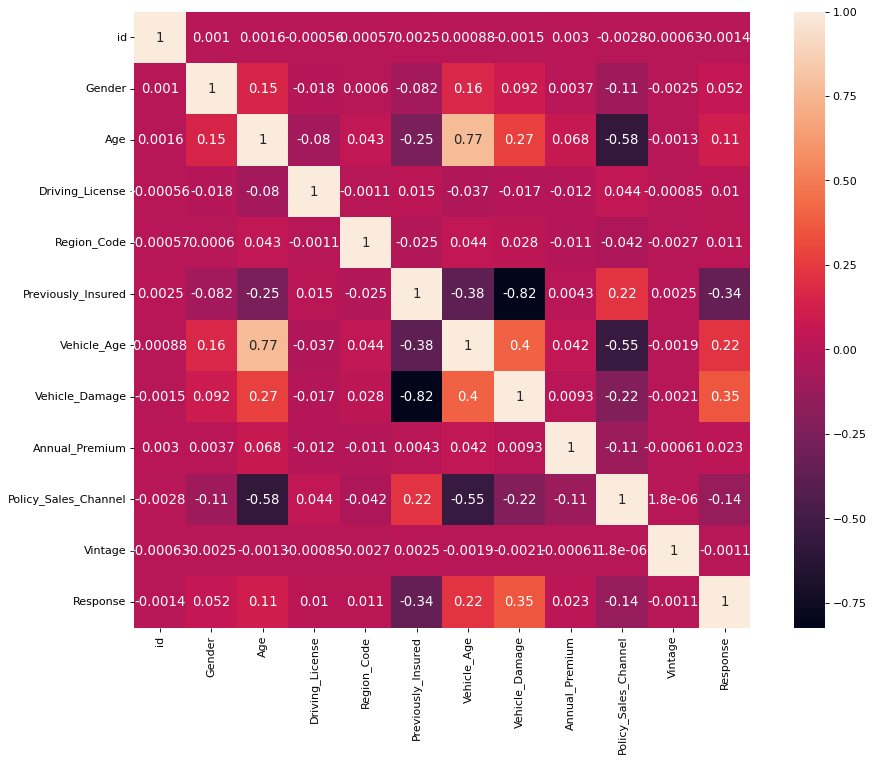

In [18]:
#creo matrice di correlazione 
plt.figure(figsize=(14, 10), dpi=80)

hm = sns.heatmap(df.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,                  
                 annot_kws={'size':12})      
plt.show()
#le maggior correlazioni sembrano esserci con Previously insured & vehicle damage

In [19]:
#creo il modello eliminando id e variabile target da X
X = df.drop(["id","Response"], axis=1).values
y=df["Response"].values
X.shape

(381109, 10)

In [20]:
#vedo se ho classi sbilanciate
counts=df["Response"].value_counts()
counts #ottengo piu risposte negative che positive, quindi c'è sbilanciamento
print(f"risposta positiva={counts[1]}")
print(f"risposta negativa={counts[0]}")

risposta positiva=46710
risposta negativa=334399


In [21]:


RANDOM_SEED=0
# Dividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Standardizzazione dei dati di addestramento
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)  

# Definisco i tre modelli con le tecniche di gestione degli sbilanciamenti e regolarizzazione Elastic Net
models = {
    'Oversampling': LogisticRegression(max_iter=1000, penalty='elasticnet', l1_ratio=0.5, solver='saga'),  
    'Undersampling': LogisticRegression(max_iter=1000, penalty='elasticnet', l1_ratio=0.5, solver='saga'),  
    'Class Weight Balanced': LogisticRegression(class_weight='balanced', max_iter=1000, penalty='elasticnet', l1_ratio=0.5, solver='saga')
}

# Applico la cross-validation solo sul set di addestramento per valutare i modelli e controllare l'eventuale overfitting
for name, model in models.items():
    if name == 'Oversampling':
        X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)
    elif name == 'Undersampling':
        X_resampled, y_resampled = RandomUnderSampler().fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    # Calcolo le metriche utilizzando cross_val_score
    scoring = ["recall", "precision", "f1"]
    for score in scoring:
        train_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=score)
        test_scores = cross_val_score(model, X_test, y_test, cv=5, scoring=score)
        print(f"{name}: {score} - Train: {train_scores.mean()}, Test: {test_scores.mean()}")

        
'''tra tutti i modelli , il class weight è l'unico in cui non ci sia differenza tra test e train
nonostante i bassi valori di f1 e precision. poichè il parametro di maggior interesse in questo caso 
è il recall, decido di andare avanti con il modello di class weight.''

Oversampling: recall - Train: 0.9751002558831294, Test: 0.0019199431414356788
Oversampling: precision - Train: 0.7051364317739404, Test: 0.37230769230769234
Oversampling: f1 - Train: 0.8184291238758569, Test: 0.003818846303971081
Undersampling: recall - Train: 0.9752772759118603, Test: 0.0019199431414356788
Undersampling: precision - Train: 0.7048080403411513, Test: 0.37230769230769234
Undersampling: f1 - Train: 0.818271196061845, Test: 0.003818846303971081
Class Weight Balanced: recall - Train: 0.9750897161189025, Test: 0.9774951528073916
Class Weight Balanced: precision - Train: 0.25021906997230936, Test: 0.25150421466601863
Class Weight Balanced: f1 - Train: 0.3982479180733609, Test: 0.40006829259814103


In [22]:
#riaddestro il modello 
best_sampling_method = "class weight"  
X_resampled, y_resampled = X_train, y_train
print(Counter(y_resampled))
# Addestrare il modello utilizzando i dati resampled
lr =LogisticRegression(class_weight='balanced', max_iter=1000, penalty='elasticnet', l1_ratio=0.5, solver='saga')
lr.fit(X_resampled, y_resampled)


Counter({0: 267553, 1: 37334})


LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=1000,
                   penalty='elasticnet', solver='saga')

In [24]:
#valuto overfitting con logloss
y_proba_train=lr.predict_proba(X_resampled)
y_proba_test=lr.predict_proba(X_test)

#TRAIN SET
train_loss = log_loss(y_resampled, y_proba_train)
print(f"TRAIN LOSS: {train_loss}")

#TEST SET
test_loss = log_loss(y_test, y_proba_test)
print(f"TEST LOSS: {test_loss}")


#i valori di log loss sono praticamente uguali tra train e test

TRAIN LOSS: 0.4911896052697201
TEST LOSS: 0.49059894402478715


In [25]:
#valuto il modello con la funzione classification report
y_pred_train=lr.predict(X_resampled)
y_pred_test=lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_resampled,y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

'''le metriche risultati non un pò basse e vi è ancora differenza tra classe 1 e classe 0 nonostante
il bilanciamento'''

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267553
           1       0.25      0.98      0.40     37334

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66846
           1       0.25      0.98      0.40      9376

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



'le metriche risultati non un pò basse e vi è ancora differenza tra classe 1 e classe 0 nonostante\nil bilanciamento'

Confusion Matrix for Training Set:
[[158472 109081]
 [   929  36405]]


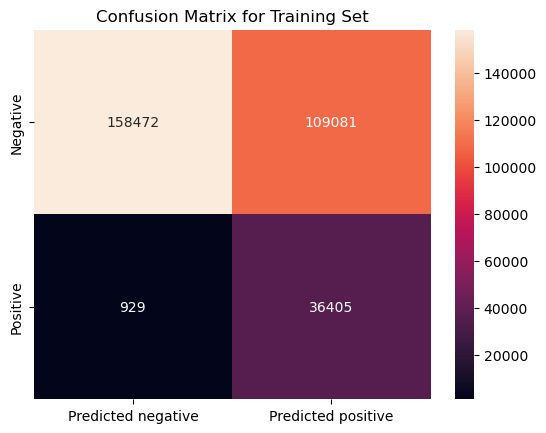

Confusion Matrix for Test Set:
[[39567 27279]
 [  210  9166]]


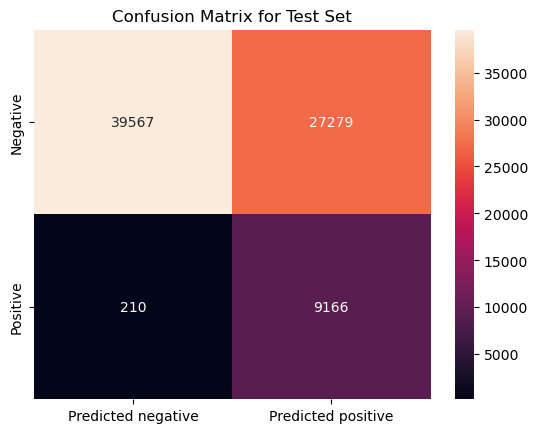

"l'ideale sarebbe avere pochi falsi positivi e pochi falsi negativi. in questo caso il modello sembra\nvedere purtroppo molti falsi positivi. tuttavia i falsi negativi sono poco e il numero di coloro\nche sicuramente non acquisteranno è abbastanza alto (veri negativi) "

In [26]:
#valuto modello con confusion _matrix

def plot_confusion_matrix (y_true, y_pred):
    cm=confusion_matrix (y_true, y_pred)
    df_cm=pd.DataFrame( cm,
                      index=["Negative", "Positive"],
                      columns=["Predicted negative", "Predicted positive"])
    sns.heatmap(df_cm,annot=True, fmt="d")

#TRAIN SET
cm_train = confusion_matrix(y_resampled, y_pred_train)
print("Confusion Matrix for Training Set:")
print(cm_train)

# Visualizzo graficamente la matrice di confusione per i dati di addestramento
plt.title("Confusion Matrix for Training Set")
plot_confusion_matrix(y_resampled, y_pred_train)
plt.show()

# TEST SET
cm_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Test Set:")
print(cm_test)

# Visualizzo graficamente la matrice di confusione per i dati di test
plt.title("Confusion Matrix for Test Set")
plot_confusion_matrix(y_test, y_pred_test)
plt.show()
'''l'ideale sarebbe avere pochi falsi positivi e pochi falsi negativi. in questo caso il modello sembra
vedere purtroppo molti falsi positivi. tuttavia i falsi negativi sono poco e il numero di coloro
che sicuramente non acquisteranno è abbastanza alto (veri negativi) ''' 

In [27]:
# Calcolo le probabilità per il train set e roc AUC
y_proba_train = lr.predict_proba(X_resampled)
roc_auc_train = roc_auc_score(y_resampled, y_proba_train[:, 1])
print("ROC AUC Score - Training Set:", roc_auc_train)

# Calcola le probabilità per il test set
y_proba_test = lr.predict_proba(X_test)
roc_auc_test = roc_auc_score(y_test, y_proba_test[:, 1])
print("ROC AUC Score - Test Set:", roc_auc_test)

ROC AUC Score - Training Set: 0.8323306094425651
ROC AUC Score - Test Set: 0.8314367077072062


In [41]:
#effettuo le previsioni e salvo in file excel

X_pred = df.drop(["id","Response"],axis=1).values
y_pred = lr.predict(X_pred)
predictions_df = pd.DataFrame({'id': df['id'], 'Response': df["Response"],'Response_Predicted': y_pred})
predictions_df.to_excel("C:\\Users\\SAMSUNG\\Desktop\\ALL FOLDERS\\MASTER Data Science\\machine learning\\predictions.xlsx", index=False)

